In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/Human_vital_signs_R.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Original class distribution:
Abnormal    19702
Normal       5791
Name: OUTPUT, dtype: int64
Class distribution after balancing:
Normal      19702
Abnormal    19702
Name: OUTPUT, dtype: int64
Cross-Validation Scores: [0.99508327 0.99397304 0.99492466 0.99524112 0.99539975]
Mean CV Accuracy: 0.9949243660860569
Classification Report:
               precision    recall  f1-score   support

    Abnormal       1.00      0.99      1.00     15764
      Normal       0.99      1.00      1.00     15759

    accuracy                           1.00     31523
   macro avg       1.00      1.00      1.00     31523
weighted avg       1.00      1.00      1.00     31523



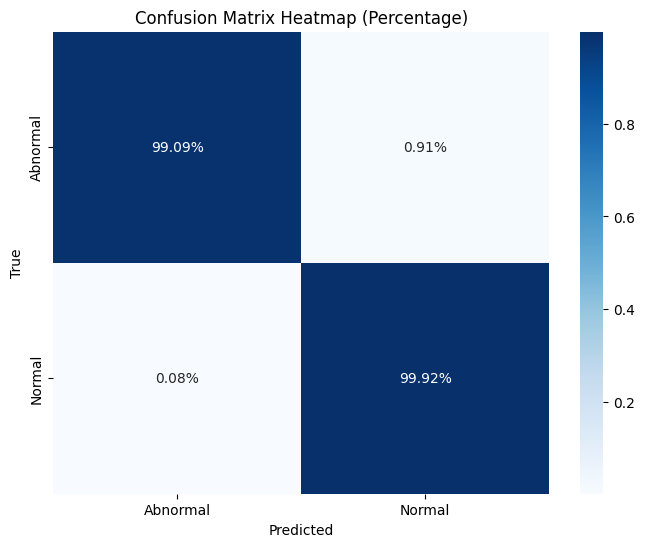

Test set accuracy is: 0.9945438396142622
        HR (BPM)   RESP (BPM)    SpO2 (%)  TEMP (*C) Prediction
9617    88.00000         14.0   99.000000       38.0   Abnormal
34470  116.00000         14.0  100.000000       26.0     Normal
22750  100.00000         18.0   99.000000       40.0   Abnormal
13287   82.00000         18.0  100.000000       41.0   Abnormal
13433   90.00000         18.0  100.000000       31.0     Normal
...          ...          ...         ...        ...        ...
36945   91.00000         20.0   97.000000       29.0     Normal
29434   89.00000         17.0   94.858866       30.0     Normal
4123    78.00000         20.0   93.000000       30.0     Normal
34337   75.00000         18.0   96.000000       29.0     Normal
27957   80.86999         15.0   97.000000       30.0     Normal

[7881 rows x 5 columns]
Original class distribution:
Abnormal    19702
Normal       5791
Name: OUTPUT, dtype: int64
Class distribution after balancing:
Normal      19702
Abnormal    19702
Na

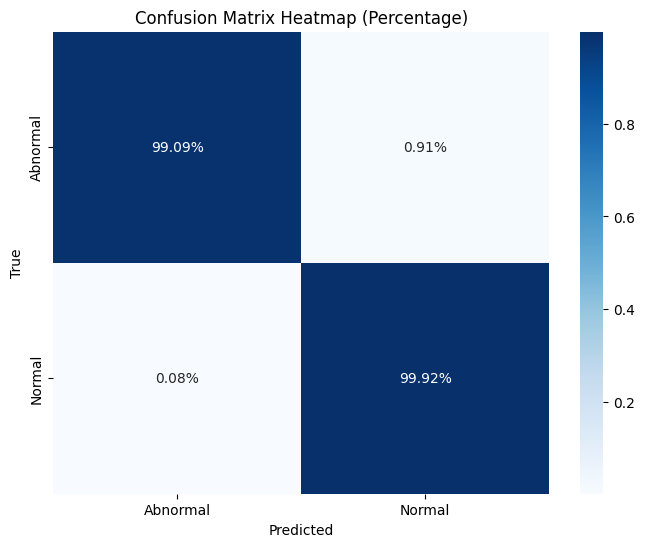

Test set accuracy is: 0.9947976145159244
        HR (BPM)   RESP (BPM)    SpO2 (%)  TEMP (*C) Prediction
9617    88.00000         14.0   99.000000       38.0   Abnormal
34470  116.00000         14.0  100.000000       26.0     Normal
22750  100.00000         18.0   99.000000       40.0   Abnormal
13287   82.00000         18.0  100.000000       41.0   Abnormal
13433   90.00000         18.0  100.000000       31.0     Normal
...          ...          ...         ...        ...        ...
36945   91.00000         20.0   97.000000       29.0     Normal
29434   89.00000         17.0   94.858866       30.0     Normal
4123    78.00000         20.0   93.000000       30.0     Normal
34337   75.00000         18.0   96.000000       29.0     Normal
27957   80.86999         15.0   97.000000       30.0     Normal

[7881 rows x 5 columns]


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
data_path = "/content/Human_vital_signs_R (1).csv"
health_data = pd.read_csv(data_path, index_col=[0])
health_data.drop('Time (s)', axis=1, inplace=True)

# Impute missing values
SI = SimpleImputer()
y = health_data['OUTPUT']
X = health_data.drop(['OUTPUT'], axis=1)

# Impute missing values in the features
X = pd.DataFrame(SI.fit_transform(X), columns=X.columns)

# Check if the dataset is imbalanced
print("Original class distribution:")
print(y.value_counts())

# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='minority', random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after balancing
print("Class distribution after balancing:")
print(y_resampled.value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.8, test_size=0.2, random_state=0)

# Train the model
rfc = RandomForestClassifier(n_estimators=500, max_depth=7)
rfc.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(rfc, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Classification report
y_pred_cv = cross_val_predict(rfc, X_train, y_train, cv=5)
classification_rep = classification_report(y_train, y_pred_cv, labels=np.unique(y_pred_cv))
print("Classification Report:\n", classification_rep)

# Confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_cv)

# Normalize confusion matrix
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Heatmap of confusion matrix in terms of percentage
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2%", cmap="Blues", xticklabels=rfc.classes_, yticklabels=rfc.classes_)
plt.title("Confusion Matrix Heatmap (Percentage)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Test set accuracy and results dataframe
result_test = rfc.predict(X_test)
score_test = accuracy_score(y_test, result_test)
print('Test set accuracy is:', score_test)

results_df = pd.DataFrame()
results_df[X_test.columns] = X_test
results_df['Prediction'] = result_test
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

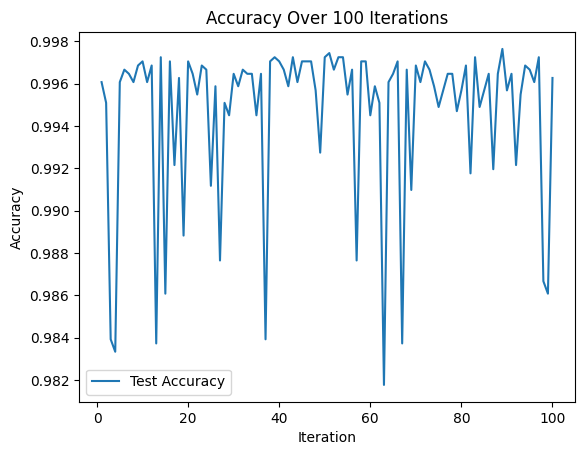

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
data_path = "/content/Human_vital_signs_R.csv"
health_data = pd.read_csv(data_path, index_col=[0])
health_data.drop('Time (s)', axis=1, inplace=True)

# Impute missing values
SI = SimpleImputer()
X_imputed = SI.fit_transform(health_data.drop('OUTPUT', axis=1))
X_imputed = pd.DataFrame(X_imputed, columns=health_data.drop('OUTPUT', axis=1).columns)

# Split data into features (X) and target (y)
y = health_data['OUTPUT']
X = X_imputed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Introduce randomness in hyperparameters
def get_random_hyperparameters():
    n_estimators = np.random.randint(50, 200)  # Adjust ranges as needed
    max_depth = np.random.randint(5, 15)
    min_samples_split = np.random.randint(2, 10)
    min_samples_leaf = np.random.randint(1, 5)
    max_features = np.random.choice(['auto', 'sqrt', 'log2'])
    return n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features

# Iterate with randomness and no fixed random state
num_iterations = 100  # Increase for more observations
accuracy_list = []

for iteration in range(num_iterations):
    # Create base estimator with randomized hyperparameters
    rf = RandomForestClassifier(
        n_estimators=get_random_hyperparameters()[0],
        max_depth=get_random_hyperparameters()[1],
        min_samples_split=get_random_hyperparameters()[2],
        min_samples_leaf=get_random_hyperparameters()[3],
        max_features=get_random_hyperparameters()[4],
    )

    # Fit and evaluate
    rf.fit(X_train, y_train)
    result = rf.predict(X_test)
    accuracy = accuracy_score(y_test, result)
    accuracy_list.append(accuracy)

# Plot accuracy
plt.plot(range(1, num_iterations + 1), accuracy_list, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Over 100 Iterations')
plt.legend()
plt.show()


Original class distribution:
Abnormal    19702
Normal       5791
Name: OUTPUT, dtype: int64
Class distribution after balancing:
Normal      19702
Abnormal    19702
Name: OUTPUT, dtype: int64
Cross-Validation Scores: [0.96938937 0.96447264 0.9704996  0.96462563 0.97001904]
Mean CV Accuracy: 0.9678012575628883
Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.97      0.97      0.97     15764
      Normal       0.97      0.97      0.97     15759

    accuracy                           0.97     31523
   macro avg       0.97      0.97      0.97     31523
weighted avg       0.97      0.97      0.97     31523



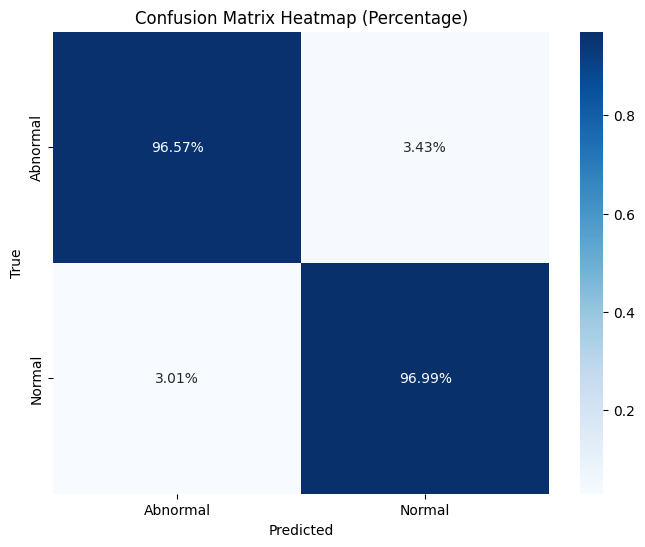

Test set accuracy is: 0.9691663494480396
        HR (BPM)   RESP (BPM)    SpO2 (%)  TEMP (*C) Prediction
9617    88.00000         14.0   99.000000       38.0   Abnormal
34470  116.00000         14.0  100.000000       26.0     Normal
22750  100.00000         18.0   99.000000       40.0   Abnormal
13287   82.00000         18.0  100.000000       41.0   Abnormal
13433   90.00000         18.0  100.000000       31.0     Normal
...          ...          ...         ...        ...        ...
36945   91.00000         20.0   97.000000       29.0     Normal
29434   89.00000         17.0   94.858866       30.0     Normal
4123    78.00000         20.0   93.000000       30.0     Normal
34337   75.00000         18.0   96.000000       29.0     Normal
27957   80.86999         15.0   97.000000       30.0     Normal

[7881 rows x 5 columns]


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
data_path = "/content/Human_vital_signs_R (1).csv"
health_data = pd.read_csv(data_path, index_col=[0])
health_data.drop('Time (s)', axis=1, inplace=True)

# Impute missing values
SI = SimpleImputer()
y = health_data['OUTPUT']
X = health_data.drop(['OUTPUT'], axis=1)

# Impute missing values in the features
X = pd.DataFrame(SI.fit_transform(X), columns=X.columns)

# Check if the dataset is imbalanced
print("Original class distribution:")
print(y.value_counts())

# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='minority', random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after balancing
print("Class distribution after balancing:")
print(y_resampled.value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.8, test_size=0.2, random_state=0)

# Train the model
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Classification report
y_pred_cv = cross_val_predict(log_reg, X_train, y_train, cv=5)
classification_rep = classification_report(y_train, y_pred_cv, labels=np.unique(y_pred_cv))
print("Classification Report:\n", classification_rep)

# Confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_cv)

# Normalize confusion matrix
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Heatmap of confusion matrix in terms of percentage
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2%", cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title("Confusion Matrix Heatmap (Percentage)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Test set accuracy and results dataframe
result_test = log_reg.predict(X_test)
score_test = accuracy_score(y_test, result_test)
print('Test set accuracy is:', score_test)

results_df = pd.DataFrame()
results_df[X_test.columns] = X_test
results_df['Prediction'] = result_test
print(results_df)



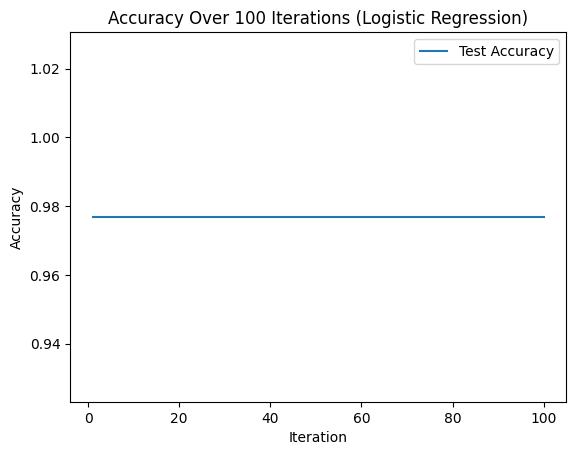

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
data_path = "/content/Human_vital_signs_R.csv"
health_data = pd.read_csv(data_path, index_col=[0])
health_data.drop('Time (s)', axis=1, inplace=True)

# Impute missing values
SI = SimpleImputer()
X_imputed = SI.fit_transform(health_data.drop('OUTPUT', axis=1))
X_imputed = pd.DataFrame(X_imputed, columns=health_data.drop('OUTPUT', axis=1).columns)

# Split data into features (X) and target (y)
y = health_data['OUTPUT']
X = X_imputed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Introduce randomness in hyperparameters (for Logistic Regression, we don't have hyperparameters like in RandomForest)
def get_random_hyperparameters():
    return {}

# Iterate with randomness and no fixed random state
num_iterations = 100  # Increase for more observations
accuracy_list = []

for iteration in range(num_iterations):
    # Create base estimator (Logistic Regression)
    logistic_reg = LogisticRegression()

    # Fit and evaluate
    logistic_reg.fit(X_train, y_train)
    result = logistic_reg.predict(X_test)
    accuracy = accuracy_score(y_test, result)
    accuracy_list.append(accuracy)

# Plot accuracy
plt.plot(range(1, num_iterations + 1), accuracy_list, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Over 100 Iterations (Logistic Regression)')
plt.legend()
plt.show()


Original class distribution:
Abnormal    19702
Normal       5791
Name: OUTPUT, dtype: int64
Class distribution after balancing:
Normal      19702
Abnormal    19702
Name: OUTPUT, dtype: int64
Cross-Validation Scores: [0.99349722 0.99381443 0.99349722 0.99444797 0.99476523]
Mean CV Accuracy: 0.9940044159618706
Classification Report:
               precision    recall  f1-score   support

    Abnormal       1.00      0.99      0.99     15764
      Normal       0.99      1.00      0.99     15759

    accuracy                           0.99     31523
   macro avg       0.99      0.99      0.99     31523
weighted avg       0.99      0.99      0.99     31523



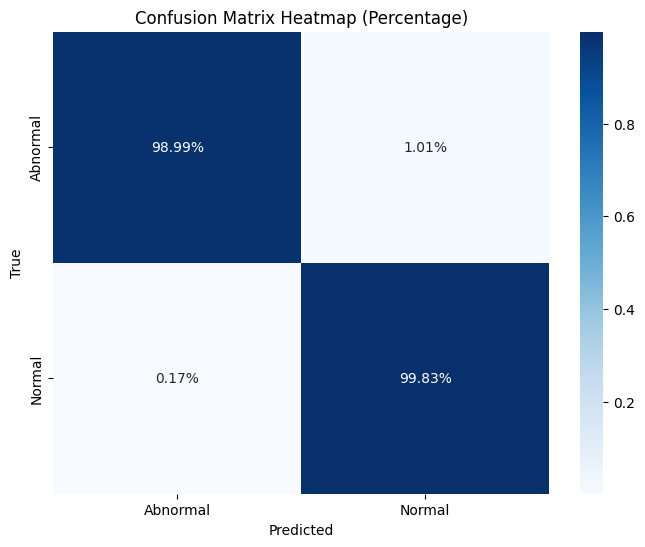

Test set accuracy is: 0.9935287400076133
        HR (BPM)   RESP (BPM)    SpO2 (%)  TEMP (*C) Prediction
9617    88.00000         14.0   99.000000       38.0   Abnormal
34470  116.00000         14.0  100.000000       26.0     Normal
22750  100.00000         18.0   99.000000       40.0   Abnormal
13287   82.00000         18.0  100.000000       41.0   Abnormal
13433   90.00000         18.0  100.000000       31.0     Normal
...          ...          ...         ...        ...        ...
36945   91.00000         20.0   97.000000       29.0     Normal
29434   89.00000         17.0   94.858866       30.0     Normal
4123    78.00000         20.0   93.000000       30.0     Normal
34337   75.00000         18.0   96.000000       29.0     Normal
27957   80.86999         15.0   97.000000       30.0     Normal

[7881 rows x 5 columns]


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
data_path = "/content/Human_vital_signs_R (1).csv"
health_data = pd.read_csv(data_path, index_col=[0])
health_data.drop('Time (s)', axis=1, inplace=True)

# Impute missing values
SI = SimpleImputer()
y = health_data['OUTPUT']
X = health_data.drop(['OUTPUT'], axis=1)

# Impute missing values in the features
X = pd.DataFrame(SI.fit_transform(X), columns=X.columns)

# Check if the dataset is imbalanced
print("Original class distribution:")
print(y.value_counts())

# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='minority', random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after balancing
print("Class distribution after balancing:")
print(y_resampled.value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.8, test_size=0.2, random_state=0)

# Train the model (using Decision Tree Classifier)
dtc = DecisionTreeClassifier(max_depth=7)
dtc.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(dtc, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Classification report
y_pred_cv = cross_val_predict(dtc, X_train, y_train, cv=5)
classification_rep = classification_report(y_train, y_pred_cv, labels=np.unique(y_pred_cv))
print("Classification Report:\n", classification_rep)

# Confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_cv)

# Normalize confusion matrix
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Heatmap of confusion matrix in terms of percentage
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2%", cmap="Blues", xticklabels=dtc.classes_, yticklabels=dtc.classes_)
plt.title("Confusion Matrix Heatmap (Percentage)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Test set accuracy and results dataframe
result_test = dtc.predict(X_test)
score_test = accuracy_score(y_test, result_test)
print('Test set accuracy is:', score_test)

results_df = pd.DataFrame()
results_df[X_test.columns] = X_test
results_df['Prediction'] = result_test
print(results_df)


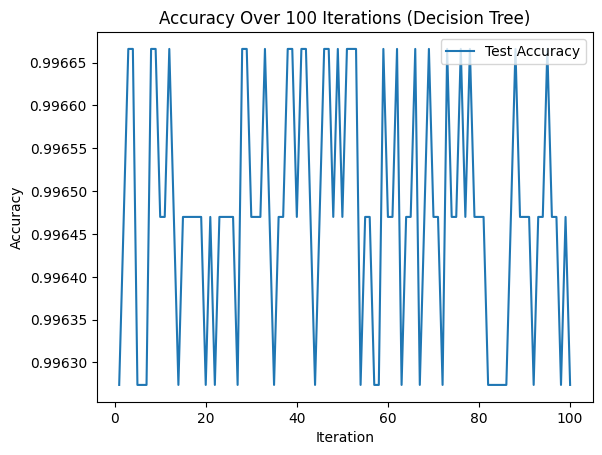

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
data_path = "/content/Human_vital_signs_R.csv"
health_data = pd.read_csv(data_path, index_col=[0])
health_data.drop('Time (s)', axis=1, inplace=True)

# Impute missing values
SI = SimpleImputer()
X_imputed = SI.fit_transform(health_data.drop('OUTPUT', axis=1))
X_imputed = pd.DataFrame(X_imputed, columns=health_data.drop('OUTPUT', axis=1).columns)

# Split data into features (X) and target (y)
y = health_data['OUTPUT']
X = X_imputed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Introduce randomness in hyperparameters (for Decision Tree, we don't have hyperparameters like in RandomForest)
def get_random_hyperparameters():
    return {}

# Iterate with randomness and no fixed random state
num_iterations = 100  # Increase for more observations
accuracy_list = []

for iteration in range(num_iterations):
    # Create base estimator (Decision Tree)
    decision_tree = DecisionTreeClassifier()

    # Fit and evaluate
    decision_tree.fit(X_train, y_train)
    result = decision_tree.predict(X_test)
    accuracy = accuracy_score(y_test, result)
    accuracy_list.append(accuracy)

# Plot accuracy
plt.plot(range(1, num_iterations + 1), accuracy_list, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Over 100 Iterations (Decision Tree)')
plt.legend()
plt.show()


Original class distribution:
Abnormal    19702
Normal       5791
Name: OUTPUT, dtype: int64
Class distribution after balancing:
Abnormal    5791
Normal      5791
Name: OUTPUT, dtype: int64
Cross-Validation Scores: [0.99352402 0.98920669 0.99298435 0.99568268 0.99622234]
Mean CV Accuracy: 0.9935240151106314
Classification Report:
               precision    recall  f1-score   support

    Abnormal       1.00      0.99      0.99      4650
      Normal       0.99      1.00      0.99      4615

    accuracy                           0.99      9265
   macro avg       0.99      0.99      0.99      9265
weighted avg       0.99      0.99      0.99      9265



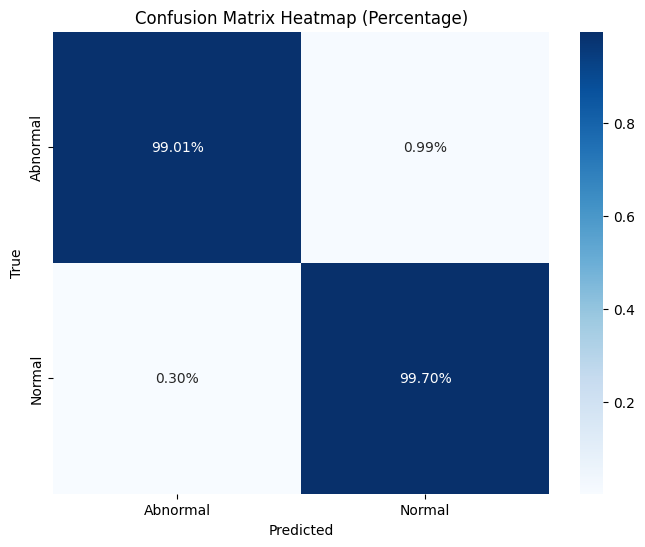

Test set accuracy is: 0.9961156668105309
        HR (BPM)   RESP (BPM)   SpO2 (%)  TEMP (*C) Prediction
8675        93.0         26.0       95.0       37.0     Normal
9108        91.0         20.0       93.0       31.0     Normal
7755        83.0         18.0       98.0       26.0     Normal
7657        77.0         20.0       93.0       28.0     Normal
9049        91.0         22.0       93.0       31.0     Normal
...          ...          ...        ...        ...        ...
11426       83.0         18.0       97.0       31.0     Normal
5566        88.0         15.0      100.0       39.0   Abnormal
5242        83.0         14.0      100.0       39.0   Abnormal
7722        83.0         19.0       98.0       29.0     Normal
3019        77.0         20.0       93.0       34.0   Abnormal

[2317 rows x 5 columns]


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
data_path = "/content/Human_vital_signs_R (1).csv"
health_data = pd.read_csv(data_path, index_col=[0])
health_data.drop('Time (s)', axis=1, inplace=True)

# Impute missing values
SI = SimpleImputer()
y = health_data['OUTPUT']
X = health_data.drop(['OUTPUT'], axis=1)

# Impute missing values in the features
X = pd.DataFrame(SI.fit_transform(X), columns=X.columns)

# Check if the dataset is imbalanced
print("Original class distribution:")
print(y.value_counts())

# Use RandomUnderSampler for undersampling
under_sampler = RandomUnderSampler(sampling_strategy='majority', random_state=0)
X_resampled_under, y_resampled_under = under_sampler.fit_resample(X, y)

# Use RandomOverSampler for oversampling
over_sampler = RandomOverSampler(sampling_strategy='minority', random_state=0)
X_resampled, y_resampled = over_sampler.fit_resample(X_resampled_under, y_resampled_under)

# Check the class distribution after balancing
print("Class distribution after balancing:")
print(y_resampled.value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.8, test_size=0.2, random_state=0)

# Train the model (using K-Nearest Neighbors)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Classification report
y_pred_cv = cross_val_predict(knn, X_train, y_train, cv=5)
classification_rep = classification_report(y_train, y_pred_cv, labels=np.unique(y_pred_cv))
print("Classification Report:\n", classification_rep)

# Confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_cv)

# Normalize confusion matrix
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Heatmap of confusion matrix in terms of percentage
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2%", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title("Confusion Matrix Heatmap (Percentage)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Test set accuracy and results dataframe
result_test = knn.predict(X_test)
score_test = accuracy_score(y_test, result_test)
print('Test set accuracy is:', score_test)

results_df = pd.DataFrame()
results_df[X_test.columns] = X_test
results_df['Prediction'] = result_test
print(results_df)



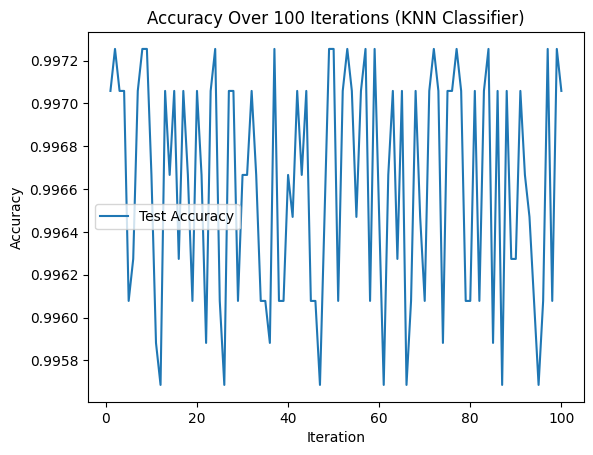

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
data_path = "/content/Human_vital_signs_R.csv"
health_data = pd.read_csv(data_path, index_col=[0])
health_data.drop('Time (s)', axis=1, inplace=True)

# Impute missing values
SI = SimpleImputer()
X_imputed = SI.fit_transform(health_data.drop('OUTPUT', axis=1))
X_imputed = pd.DataFrame(X_imputed, columns=health_data.drop('OUTPUT', axis=1).columns)

# Split data into features (X) and target (y)
y = health_data['OUTPUT']
X = X_imputed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Introduce randomness in hyperparameters
def get_random_hyperparameters():
    n_neighbors = np.random.randint(2, 10)  # Adjust ranges as needed
    weights = np.random.choice(['uniform', 'distance'])
    return n_neighbors, weights

# Iterate with randomness and no fixed random state
num_iterations = 100  # Increase for more observations
accuracy_list = []

for iteration in range(num_iterations):
    # Create base estimator with randomized hyperparameters
    knn = KNeighborsClassifier(
        n_neighbors=get_random_hyperparameters()[0],
        weights=get_random_hyperparameters()[1],
    )

    # Fit and evaluate
    knn.fit(X_train, y_train)
    result = knn.predict(X_test)
    accuracy = accuracy_score(y_test, result)
    accuracy_list.append(accuracy)

# Plot accuracy
plt.plot(range(1, num_iterations + 1), accuracy_list, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Over 100 Iterations (KNN Classifier)')
plt.legend()
plt.show()


In [ ]:
!pip install gplearn


Original class distribution:
Abnormal    19702
Normal       5791
Name: OUTPUT, dtype: int64
Class distribution after balancing:
Normal      19702
Abnormal    19702
Name: OUTPUT, dtype: int64
Cross-Validation Scores: [0.98762887 0.97065821 0.98984933 0.98667513 0.98239213]
Mean CV Accuracy: 0.9834407317132081
Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.99      0.98      0.98     15764
      Normal       0.98      0.99      0.98     15759

    accuracy                           0.98     31523
   macro avg       0.98      0.98      0.98     31523
weighted avg       0.98      0.98      0.98     31523



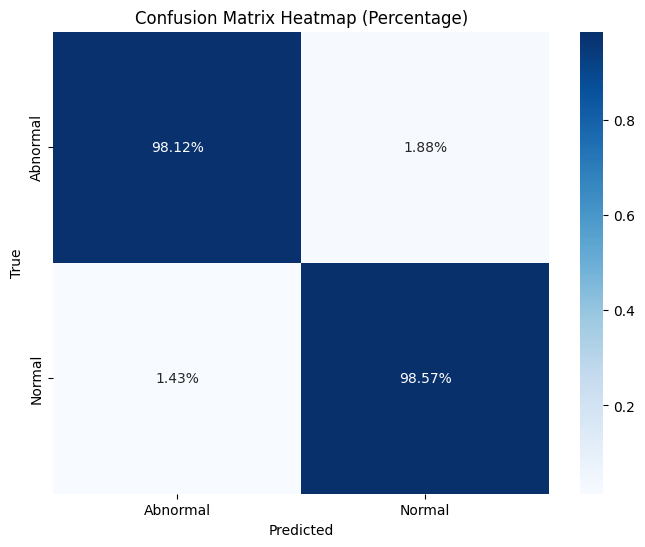

Test set accuracy is: 0.9903565537368354
        HR (BPM)   RESP (BPM)    SpO2 (%)  TEMP (*C) Prediction
9617    88.00000         14.0   99.000000       38.0   Abnormal
34470  116.00000         14.0  100.000000       26.0     Normal
22750  100.00000         18.0   99.000000       40.0   Abnormal
13287   82.00000         18.0  100.000000       41.0   Abnormal
13433   90.00000         18.0  100.000000       31.0     Normal
...          ...          ...         ...        ...        ...
36945   91.00000         20.0   97.000000       29.0     Normal
29434   89.00000         17.0   94.858866       30.0     Normal
4123    78.00000         20.0   93.000000       30.0     Normal
34337   75.00000         18.0   96.000000       29.0     Normal
27957   80.86999         15.0   97.000000       30.0     Normal

[7881 rows x 5 columns]


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
data_path = "/content/Human_vital_signs_R (1).csv"
health_data = pd.read_csv(data_path, index_col=[0])
health_data.drop('Time (s)', axis=1, inplace=True)

# Impute missing values
SI = SimpleImputer()
y = health_data['OUTPUT']
X = health_data.drop(['OUTPUT'], axis=1)

# Impute missing values in the features
X = pd.DataFrame(SI.fit_transform(X), columns=X.columns)

# Check if the dataset is imbalanced
print("Original class distribution:")
print(y.value_counts())

# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='minority', random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after balancing
print("Class distribution after balancing:")
print(y_resampled.value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.8, test_size=0.2, random_state=0)

# Train the model (using MLP Classifier)
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=0)
mlp.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(mlp, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Classification report
y_pred_cv = cross_val_predict(mlp, X_train, y_train, cv=5)
classification_rep = classification_report(y_train, y_pred_cv, labels=np.unique(y_pred_cv))
print("Classification Report:\n", classification_rep)

# Confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_cv)

# Normalize confusion matrix
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Heatmap of confusion matrix in terms of percentage
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2%", cmap="Blues", xticklabels=mlp.classes_, yticklabels=mlp.classes_)
plt.title("Confusion Matrix Heatmap (Percentage)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Test set accuracy and results dataframe
result_test = mlp.predict(X_test)
score_test = accuracy_score(y_test, result_test)
print('Test set accuracy is:', score_test)

results_df = pd.DataFrame()
results_df[X_test.columns] = X_test
results_df['Prediction'] = result_test
print(results_df)



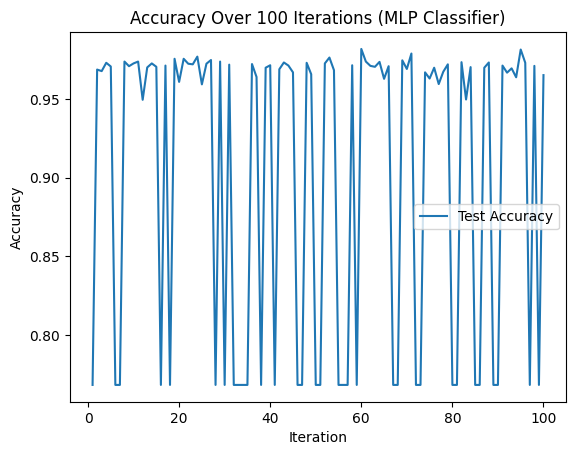

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
data_path = "/content/Human_vital_signs_R.csv"
health_data = pd.read_csv(data_path, index_col=[0])
health_data.drop('Time (s)', axis=1, inplace=True)

# Impute missing values
SI = SimpleImputer()
X_imputed = SI.fit_transform(health_data.drop('OUTPUT', axis=1))
X_imputed = pd.DataFrame(X_imputed, columns=health_data.drop('OUTPUT', axis=1).columns)

# Split data into features (X) and target (y)
y = health_data['OUTPUT']
X = X_imputed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Introduce randomness in hyperparameters
def get_random_hyperparameters():
    hidden_layer_sizes = tuple(np.random.randint(5, 50, np.random.randint(1, 5)))  # Randomize the number of hidden layers and neurons
    activation = np.random.choice(['identity', 'logistic', 'tanh', 'relu'])
    learning_rate_init = np.random.uniform(0.001, 0.1)
    return hidden_layer_sizes, activation, learning_rate_init

# Iterate with randomness and no fixed random state
num_iterations = 100  # Increase for more observations
accuracy_list = []

for iteration in range(num_iterations):
    # Create base estimator with randomized hyperparameters
    mlp = MLPClassifier(
        hidden_layer_sizes=get_random_hyperparameters()[0],
        activation=get_random_hyperparameters()[1],
        learning_rate_init=get_random_hyperparameters()[2],
    )

    # Fit and evaluate
    mlp.fit(X_train, y_train)
    result = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, result)
    accuracy_list.append(accuracy)

# Plot accuracy
plt.plot(range(1, num_iterations + 1), accuracy_list, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Over 100 Iterations (MLP Classifier)')
plt.legend()
plt.show()


In [ ]:
pip install catboost lightgbm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.3 MB/s eta 0:00:00


In [ ]:
pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.4 MB/s eta 0:00:00


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

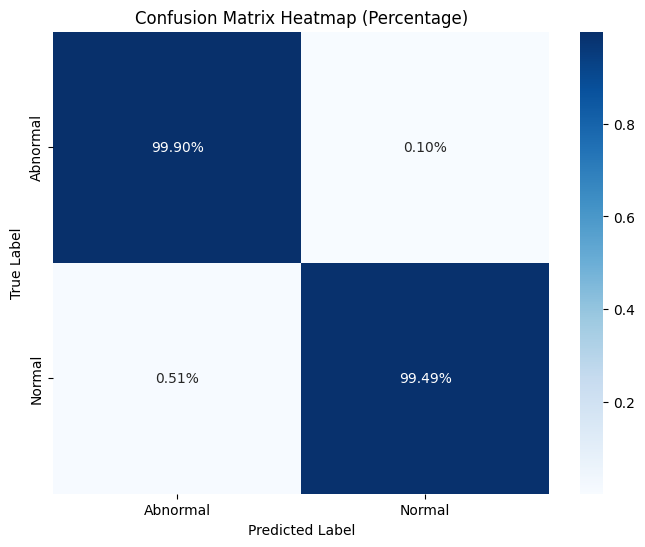

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
data_path = "/content/Human_vital_signs_R.csv"
health_data = pd.read_csv(data_path, index_col=[0])
health_data.drop('Time (s)', axis=1, inplace=True)

# Impute missing values
SI = SimpleImputer()
X_imputed = SI.fit_transform(health_data.drop('OUTPUT', axis=1))
X_imputed = pd.DataFrame(X_imputed, columns=health_data.drop('OUTPUT', axis=1).columns)

# Split data into features (X) and target (y)
y = health_data['OUTPUT']
X = X_imputed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# LightGBM Classifier with tuned hyperparameters
lgbm = LGBMClassifier(n_estimators=1000, max_depth=15, num_leaves=150, learning_rate=0.05, colsample_bytree=0.8)

# CatBoost Classifier with tuned hyperparameters
catboost = CatBoostClassifier(n_estimators=1000, max_depth=15, verbose=0)

# Explainable Boosting Classifier
ebc = ExplainableBoostingClassifier()

# Create a stacking classifier with LightGBM, CatBoost, and Explainable Boosting Classifier as base estimators
stacking_classifier = StackingClassifier(
    estimators=[('lgbm', lgbm), ('catboost', catboost)],
    final_estimator=ebc,
    stack_method='auto',
)

# Perform cross-validation with scaled data
cv_scores = cross_val_score(stacking_classifier, X_train, y_train, cv=5, scoring='accuracy')

print('Cross-Validation Scores:', cv_scores)
print('Mean CV Accuracy:', cv_scores.mean())

# Fit the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test data
result = stacking_classifier.predict(X_test)

# Calculate accuracy, confusion matrix, and classification report
score = accuracy_score(y_test, result)
conf_matrix = confusion_matrix(y_test, result)

# Normalize confusion matrix
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

class_report = classification_report(y_test, result)

print('Accuracy:', score)
print('Confusion Matrix:')
print(conf_matrix_percentage)
print('Classification Report:')
print(class_report)

# Display the heatmap of the confusion matrix in terms of percentage
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2%", cmap="Blues", xticklabels=stacking_classifier.classes_, yticklabels=stacking_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (Percentage)')
plt.show()
